In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import _collections_abc
import sqlalchemy
from sqlalchemy import create_engine as ce
from sklearn.cluster import KMeans
import sqlite3
import datetime

In [4]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [5]:
conn = create_connection('politicians2.db')

In [6]:
curs = conn.cursor()

In [7]:
curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

[('parliaments',),
 ('parliament_periods',),
 ('parties',),
 ('mandates',),
 ('candidacies',),
 ('politicians',),
 ('Contributor',),
 ('Page',),
 ('Revision',)]

In [8]:
for row in curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'"):
    print(row)

('parliaments',)
('parliament_periods',)
('parties',)
('mandates',)
('candidacies',)
('politicians',)
('Contributor',)
('Page',)
('Revision',)


In [9]:
%%time
#abgeordnete = curs.execute("SELECT * FROM politicians").fetchall()
#parteien = curs.execute("SELECT * FROM parties").fetchall()
#parlamente =  curs.execute("SELECT * FROM parliaments").fetchall() 
#parlamentsperioden = curs.execute("SELECT * FROM parliament_periods").fetchall()
#mandate = curs.execute("SELECT * FROM mandates").fetchall()
#kandidaten = curs.execute("SELECT * FROM candidacies").fetchall()
#contributor = curs.execute("SELECT * FROM Contributor").fetchall()
#artikel = curs.execute("SELECT * FROM Page").fetchall()
#revision = curs.execute("SELECT * FROM Revision").fetchall()

Wall time: 0 ns


# Rekord für Anderungen

In [10]:
%%time
print(curs.execute("SELECT Vorname, Nachname, MAX(Changecounter) FROM change_count").fetchone())

OperationalError: no such column: Vorname

### und der gewinner ist....

# Angela Merkel

### ..mit sage und schreibe 

## 5453 Änderungen


In [11]:
%%time
query=pd.read_sql("select sum(change_count.Changecounter) FROM change_count ",conn)
print(query)

DatabaseError: Execution failed on sql 'select sum(change_count.Changecounter) FROM change_count ': no such column: change_count.Changecounter

## Es gibt insgesamt 
# 410819
## Änderungen 

In [12]:
%%time
print(curs.execute("SELECT DISTINCT(Vorname), Nachname FROM revision_time where Nachname is not NULL").fetchmany(5))

OperationalError: no such column: Vorname

In [13]:
%%time 
print(curs.execute("SELECT  revision_time.Vorname, revision_time.Nachname,revision_time.timestamp, change_count.Changecounter FROM revision_time Left JOIN change_count on revision_time.Politiker_ID = change_count.Politiker_ID GROUP BY timestamp ").fetchmany(10))

OperationalError: no such column: revision_time.Vorname

In [14]:
    %%time 
   
#    x=1
#    rows = curs.execute("SELECT `Vorname`, `Nachname`,timestamp  FROM `revision_time` WHERE (`Vorname` = 'Angela') AND (`Nachname` = 'Merkel') ").fetchall()
#    for row in rows:
#        print(x,row)
#        x=x+1v


    
  

Wall time: 0 ns


In [15]:
%%time
trampstamp_Merkel = curs.execute("SELECT timestamp FROM `revision_time` WHERE (`Vorname` = 'Angela') AND (`Nachname` = 'Merkel') ").fetchall()
print(trampstamp_Merkel)

OperationalError: no such column: Vorname

In [16]:
%%time
Merkel_change_date=[]
for x in trampstamp_Merkel:
    str = ''.join(x)
    Merkel_change_date.append(str[0:10])
    


NameError: name 'trampstamp_Merkel' is not defined

In [17]:
%%time
Merkel_date = []
for date in Merkel_change_date:
    datestamp = pd.to_datetime(date, format="%Y-%m-%d")
    Merkel_date.append(datestamp)
print(Merkel_date)

[]
Wall time: 0 ns


In [18]:
%%time
from collections import Counter


cnt = Counter()
for word in Merkel_change_date:
    cnt[word] += 1


Wall time: 0 ns


In [19]:

list = [(k, v) for k, v in cnt.items()]

Wall time: 45 ms


<AxesSubplot:>

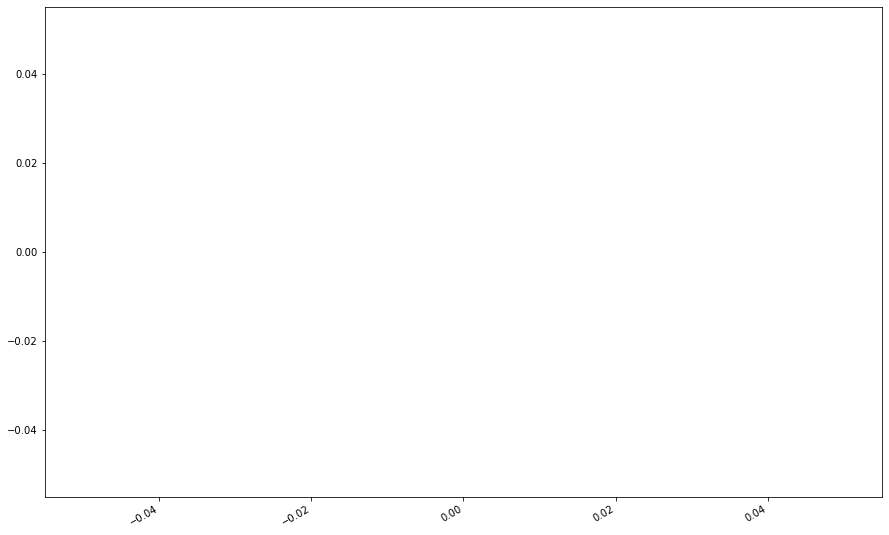

In [20]:
%%time
dyn = pd.DataFrame({'Date':pd.to_datetime(Merkel_change_date)})

s = dyn['Date'].value_counts().sort_index()
plt.gcf().set_size_inches(15, 10)
s.plot()

In [21]:
%%time
trampstamp_b = curs.execute("SELECT timestamp FROM `revision_time` WHERE (`Vorname` = 'Annalena') AND (`Nachname` = 'Baerbock') ").fetchall()

b_change_date=[]
for x in trampstamp_b:
    str = ''.join(x)
    b_change_date.append(str[0:10])


baerbock = pd.DataFrame({'Date':pd.to_datetime(b_change_date)})

b = baerbock['Date'].value_counts().sort_index()
plt.gcf().set_size_inches(15, 10)
b.plot()

OperationalError: no such column: Vorname

Wall time: 1.13 s


<AxesSubplot:>

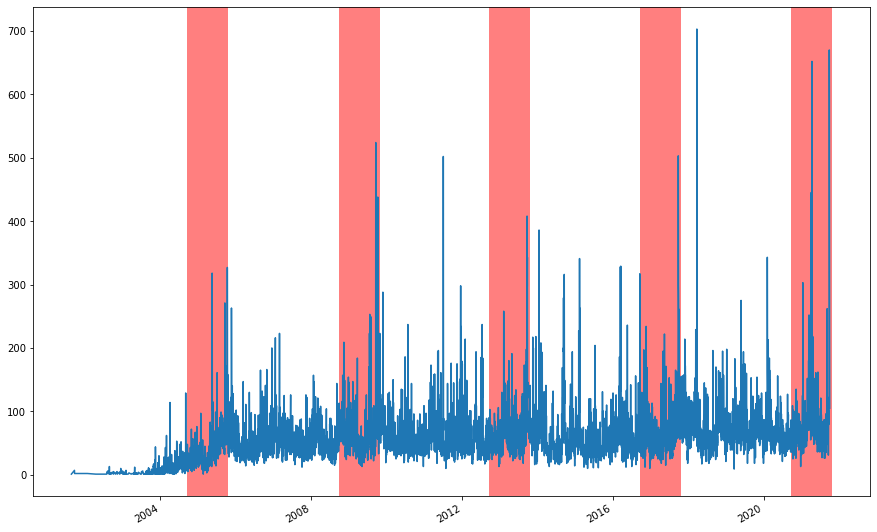

In [22]:
%%time
trampstamp_gesamt = curs.execute("SELECT timestamp FROM `revision_time`  ").fetchall()

g_change_date=[]
for x in trampstamp_gesamt:
    str = ''.join(x)
    g_change_date.append(str[0:10])

gesamt = pd.DataFrame({'Date':pd.to_datetime(g_change_date)})

g = gesamt['Date'].value_counts().sort_index()
plt.gcf().set_size_inches(15, 10)
plt.axvspan(datetime.datetime.strptime("18-09-2004", '%d-%m-%Y'), datetime.datetime.strptime("18-10-2005", '%d-%m-%Y'), alpha=0.5, fill=True, linewidth=0, color='r')
plt.axvspan(datetime.datetime.strptime("27-09-2008", '%d-%m-%Y'), datetime.datetime.strptime("27-10-2009", '%d-%m-%Y'), alpha=0.5, fill=True, linewidth=0, color='r')
plt.axvspan(datetime.datetime.strptime("22-09-2012", '%d-%m-%Y'), datetime.datetime.strptime("22-10-2013", '%d-%m-%Y'), alpha=0.5, fill=True, linewidth=0, color='r')
plt.axvspan(datetime.datetime.strptime("24-09-2016", '%d-%m-%Y'), datetime.datetime.strptime("24-10-2017", '%d-%m-%Y'), alpha=0.5, fill=True, linewidth=0, color='r')
plt.axvspan(datetime.datetime.strptime("26-09-2020", '%d-%m-%Y'), datetime.datetime.strptime("26-10-2021", '%d-%m-%Y'), alpha=0.5, fill=True, linewidth=0, color='r')
g.plot()

Wall time: 126 ms


<AxesSubplot:>

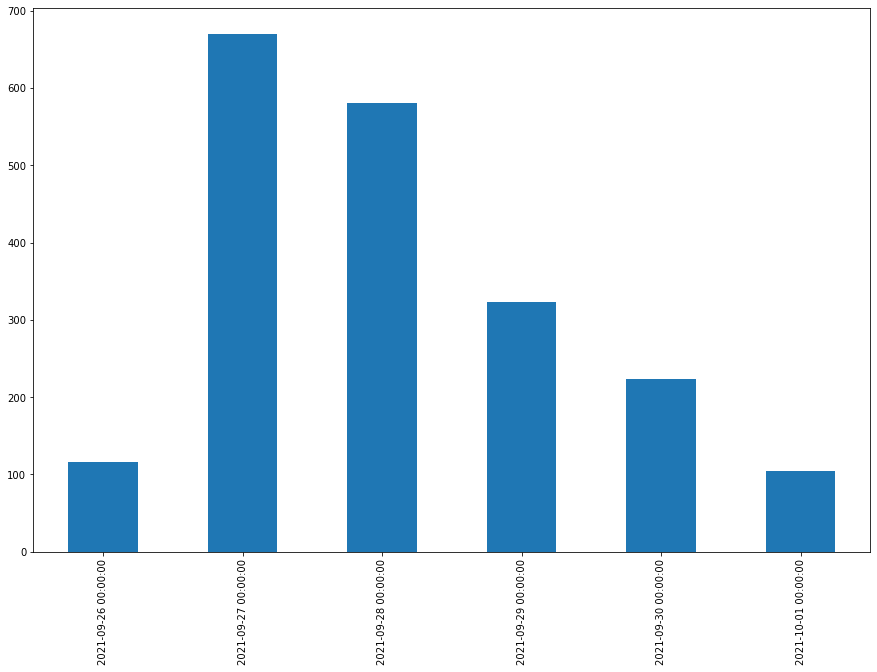

In [23]:
%%time
trampstamp_election = curs.execute("SELECT timestamp FROM `revision_time` WHERE timestamp > '2021-09-26' ").fetchall()

e_change_date=[]
for x in trampstamp_election:
    str = ''.join(x)
    e_change_date.append(str[0:10])

election = pd.DataFrame({'Date':pd.to_datetime(e_change_date)})

e = election['Date'].value_counts().sort_index()
plt.gcf().set_size_inches(15, 10)
e.plot.bar()

Wall time: 325 ms


<AxesSubplot:>

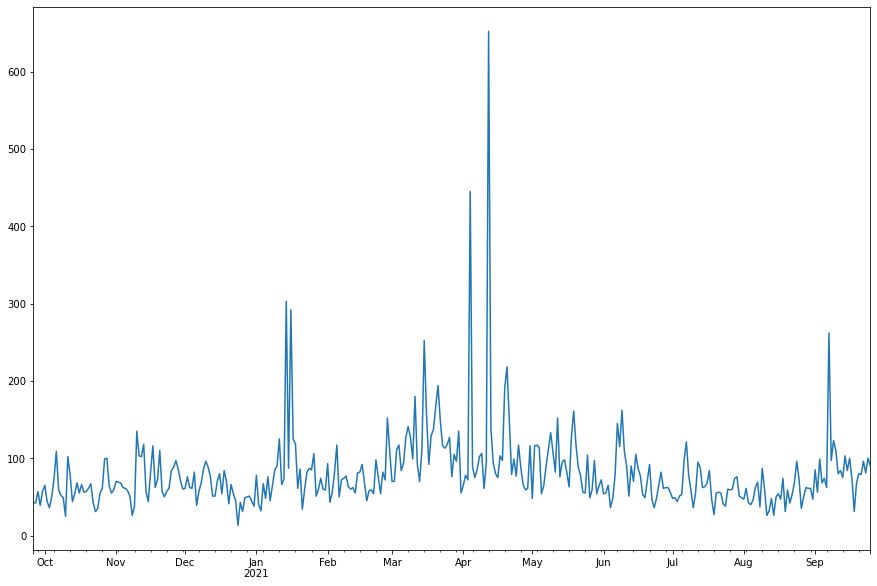

In [24]:
%%time
trampstamp_election1 = curs.execute("SELECT timestamp FROM `revision_time` WHERE timestamp between '2020-09-26' and '2021-09-26' ").fetchall()

e_change_date1=[]
for x in trampstamp_election1:
    str = ''.join(x)
    e_change_date1.append(str[0:10])

election1 = pd.DataFrame({'Date':pd.to_datetime(e_change_date1)})

e1 = election1['Date'].value_counts().sort_index()
plt.gcf().set_size_inches(15, 10)
e1.plot()

Wall time: 508 ms


<AxesSubplot:>

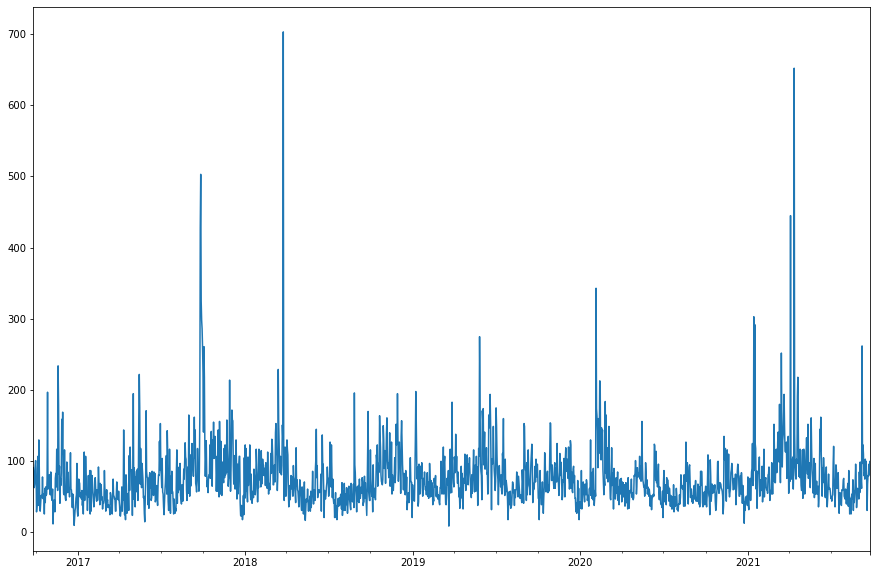

In [25]:
%%time
trampstamp_election2 = curs.execute("SELECT timestamp FROM `revision_time` WHERE timestamp between '2016-09-26' and '2021-09-26' ").fetchall()

e_change_date2=[]
for x in trampstamp_election2:
    str = ''.join(x)
    e_change_date2.append(str[0:10])

election2 = pd.DataFrame({'Date':pd.to_datetime(e_change_date2)})

e2 = election2['Date'].value_counts().sort_index()
plt.gcf().set_size_inches(15, 10)
e2.plot()

In [26]:
connection = ce('sqlite:///politicians2.db').connect()

In [27]:
%%time
trampstamp_new = curs.execute("SELECT timestamp FROM `party_analysis`  ").fetchall()

n_change_date=[]
for x in trampstamp_new:
    str = ''.join(x)
    n_change_date.append(str[0:10])

new = pd.DataFrame({'Date':pd.to_datetime(g_change_date)})

OperationalError: no such table: party_analysis

<AxesSubplot:xlabel='Partei'>

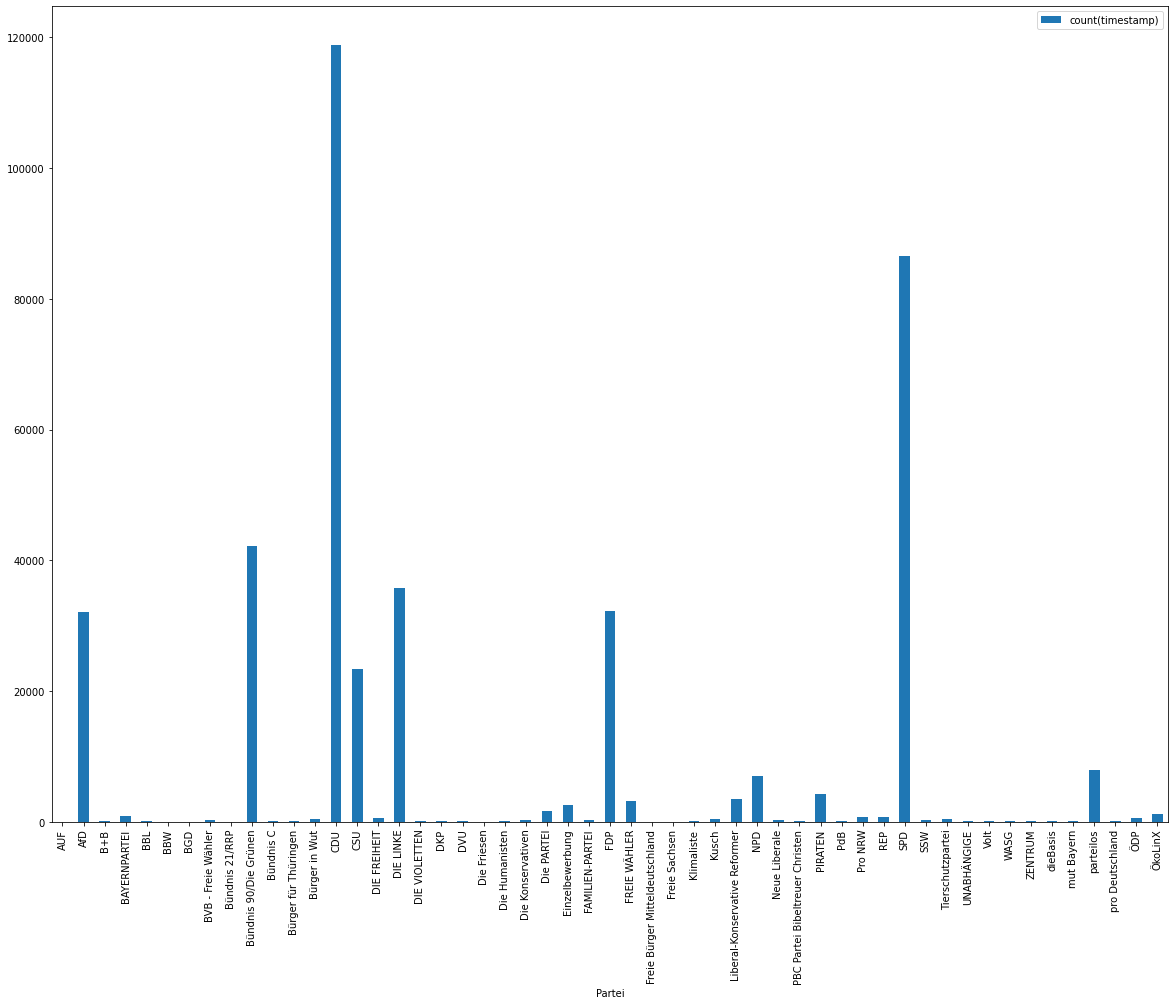

In [26]:
party=pd.read_sql("select count(timestamp), Partei FROM party_analysis group by Partei", conn)
party.groupby(['Partei']).sum().plot(kind='bar',y='count(timestamp)',figsize=(20, 15))

In [27]:
#print(party)

<AxesSubplot:xlabel='Partei'>

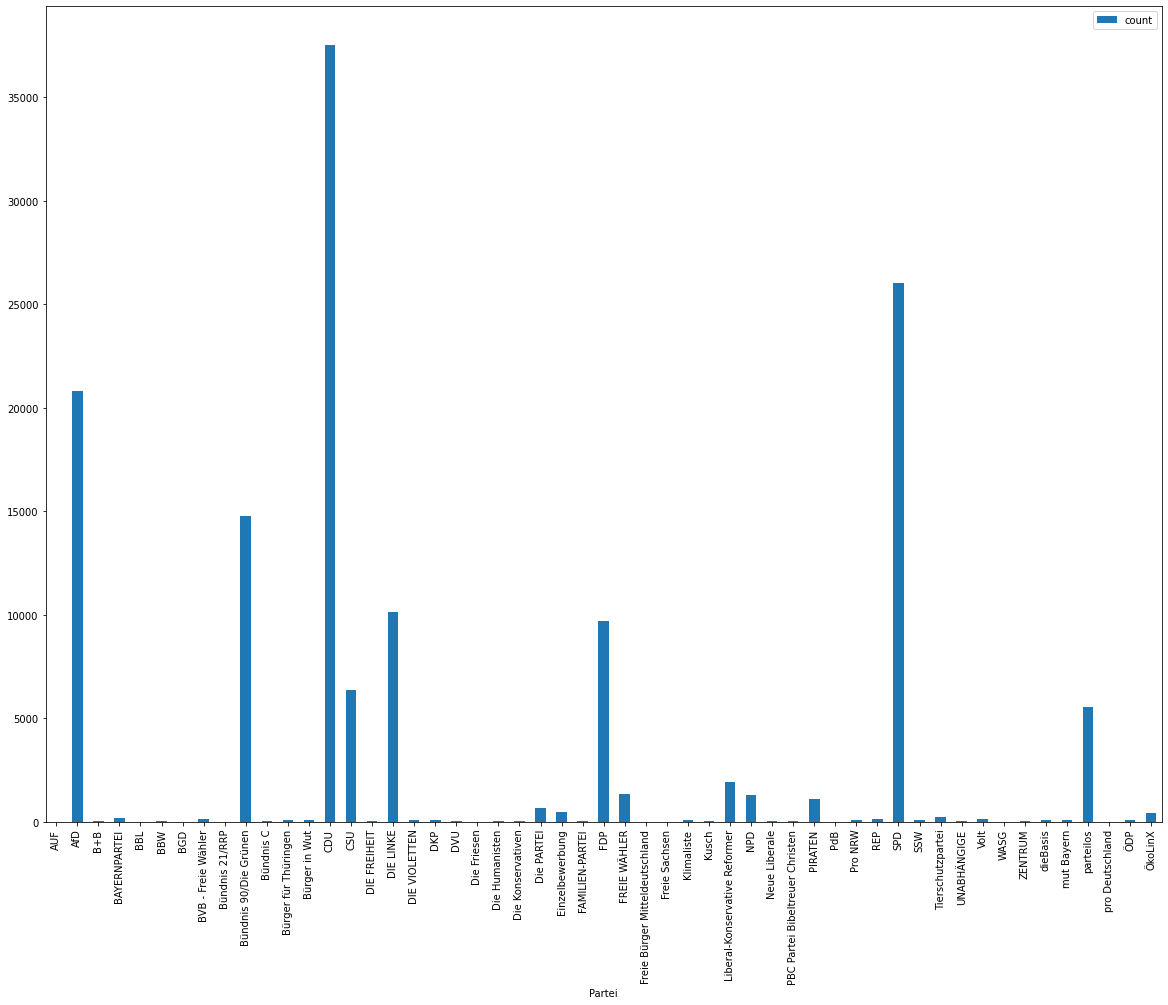

In [40]:
partey=pd.read_sql("select count(timestamp) as count, Partei FROM party_analysis where timestamp between '2016-09-26' and '2021-10-01' group by Partei", conn, columns=['Partei', 'count'])

partey.groupby(['Partei']).sum().plot(kind='bar',y='count',figsize=(20, 15)) 

In [42]:
ja=[tuple(r) for r in partey.to_numpy()]
nein=[]
for i in ja:
      if i[0]>5000: nein.append(i[1])
print(nein)

['AfD', 'Bündnis 90/Die Grünen', 'CDU', 'CSU', 'DIE LINKE', 'FDP', 'SPD', 'parteilos']


In [2]:
%%time 
SQL_Query = pd.read_sql_query(
        '''select Partei, date(timestamp) as Tag FROM party_analysis''', conn)
df = pd.DataFrame(SQL_Query, columns=['Partei', 'Tag'])
a = df.pivot_table(columns=['Partei'], index=['Tag'], aggfunc='size').fillna(0)

a.filter(items=nein).loc[a.index.to_series().between('2016-09-26','2021-10-01')].plot(kind='area',stacked=False, figsize=(20, 15)).axvline(linewidth=4, color='r', x='2020-11-15', ymin=0.25, ymax=0.75)
plt.show(block=True);

NameError: name 'pd' is not defined